In [1]:
# Using LeNet 5 for MNIST Dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.losses import CategoricalCrossentropy

In [3]:
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.mnist.load_data()
X_val, y_val = X_train[55000:, ...,np.newaxis],y_train[55000:]
X_train,y_train=X_train[:55000,...,np.newaxis],y_train[:55000]
X_test=X_test[...,np.newaxis]

In [4]:
print("Image Shape: {}".format(X_train[0].shape), end = '\n\n')
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set:   {} samples".format(len(X_val)))
print("Test Set:       {} samples".format(len(X_test)))

Image Shape: (28, 28, 1)

Training Set:   55000 samples
Validation Set:   5000 samples
Test Set:       10000 samples


In [5]:
X_train = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_val = np.pad(X_val, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

In [6]:
print("Updated Image Shape for: ", end='\n\n')
print("-Training set: {}".format(X_train.shape))
print("-Validation set: {}".format(X_val.shape))
print("-Test set: {}".format(X_test.shape))

Updated Image Shape for: 

-Training set: (55000, 32, 32, 1)
-Validation set: (5000, 32, 32, 1)
-Test set: (10000, 32, 32, 1)


In [7]:
# Normalization

X_train, X_val, X_test = X_train/float(255), X_val/float(255), X_test/float(255)
X_train -= np.mean(X_train)
X_val -= np.mean(X_val)
X_test -= np.mean(X_test)

In [8]:
# Def LeNet_5():
model=Sequential()

# C1: (None,32,32,1) -> (None,28,28,6).
model.add(Conv2D(6,kernel_size=(5,5),strides=(1,1),activation='tanh',input_shape=(32,32,1),padding='valid'))

# P1: (None,28,28,6) -> (None,14,14,6)
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

C:\Users\sharm\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# C2: (None,14,14,6) -> (None,10,10,16).
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# P2: (None,10,10,16) -> (None,5,5,16).
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

In [10]:
# Flatten: (None,5,5,16) -> (None, 400).
model.add(Flatten())

In [11]:
# FC1: (None, 400) -> (None,120).
model.add(Dense(120, activation='tanh'))

In [12]:
# FC1: (None, 120) -> (None,84).
model.add(Dense(84, activation='tanh'))

In [13]:
# FC1: (None, 84) -> (None,10).
model.add(Dense(10, activation='softmax'))

In [14]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) 

In [15]:
history=model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=5)

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.7092 - loss: 1.0647 - val_accuracy: 0.9334 - val_loss: 0.2508
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9110 - loss: 0.3030 - val_accuracy: 0.9488 - val_loss: 0.1804
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9337 - loss: 0.2240 - val_accuracy: 0.9620 - val_loss: 0.1418
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9466 - loss: 0.1773 - val_accuracy: 0.9668 - val_loss: 0.1178
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9585 - loss: 0.1409 - val_accuracy: 0.9702 - val_loss: 0.1023


In [16]:
# Make prediction.
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [17]:
# Retrieve predictions indexes.
y_pred = np.argmax(predictions, axis=1)

In [18]:
# Print test set accuracy.
print('Test set error rate: {}'.format(np.mean(y_pred != y_test)))

Test set error rate: 0.0332



Plot of training error over 5 epochs:


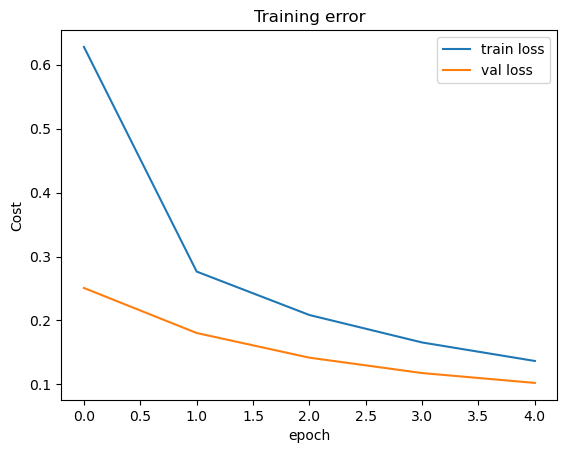

In [20]:
# Plot training error.
print('\nPlot of training error over 5 epochs:')
plt.title('Training error')
plt.ylabel('Cost')
plt.xlabel('epoch')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train loss', 'val loss'], loc='upper right')
plt.show()